## Concept Questions
### **What is Django's MTV pattern?**
It is similar to MVC but with Django-specific naming:
- Model: Handles database structure and ORM queries.
- Template: Handles UI and presentation (HTML).
- View: Contains the business logic; receives requests, queries models, and returns responses.

Django’s URL dispatcher acts like the controller, routing requests to views.



### **What's the difference between blank=True and null=True?**
- **null=True (Database-level)**
    - Allows the column to store NULL in the database.
    - For non-string fields, use null=True.
- **blank=True (Validation-level)**
    - Field is allowed to be empty in forms (admin or DRF serializers).
    - Purely a validation rule — does not affect the database.

Common rule:
- String-based fields (CharField, TextField): null=False, blank=True
- Others (IntegerField, DateField): null=True, blank=True (if optional)



### **What's the difference between auto_now and auto_now_add?**
**auto_now_add=True**
- Sets the timestamp **once** when the object **is created**.
- Good for **created_at**.

**auto_now=True**
- Updates the field automatically on **every save**.
- Good for **updated_at**.



### **What are Django migrations and why are they important?**
- Migrations are Django’s system for **tracking and applying database schema changes**.
- Migrations = “database version control” for Django.

They are important because they:
- Keep the database schema in sync with your models
- Allow version-controlled schema changes
- Support evolving schema safely (makemigrations → migrate)
- Enable rollback, forward migration, and collaboration



### **What is the N+1 query problem? How to avoid it in Django**
N+1 query problem happens when:
- You perform 1 query for a list of objects
- Then N more queries to fetch related objects inside a loop

Example bad pattern:
```python
books = Book.objects.all()
for book in books:
    print(book.author.name)  # triggers an extra query per iteration
```

How to avoid it (Django ORM):
- Use **select_related()** for foreign key / one-to-one
- Use **prefetch_related()** for many-to-many / reverse FK
- Use **annotate()** to avoid separate aggregate queries

Example fix:
```python
books = Book.objects.select_related("author")
```



### **What is the Meta class in Django models?**

class Meta: is an **inner class** used to **configure model-level options** such as:
- ordering = ['created_at']
- db_table = 'custom_table_name'
- verbose_name, verbose_name_plural
- unique_together, constraints
- permissions

It customizes **how Django interacts with the database and admin**.



### **What's the purpose of `__str__()` method in models?**
`__str__()` defines the human-readable **string representation of a model instance**.

Used in:
- Django Admin (object list display)
- Print statements
- Shell interaction
- Logs

Without it, Django displays objects as <ModelName: ModelName object (1)>.

## Coding Challenge:

### 1. Implement the Blog app on your own
Follow the quick reference guide to create the blog app on your local step by step

### 2. Django ORM practice
Write these queries in shell and save the output    

1. Get all published posts
2. Get all posts by user 'john'
3. Get all posts in "Technology" category
4. Count total posts
5. Count total comments
6. Get posts with no categories
7. Get the 3 newest posts
8. Get all categories sorted alphabetically

```bash
In [7]: Post.objects.filter(published=True)
Out[7]: <QuerySet [<Post: First Post>, <Post: Second Post>]>

In [8]: Post.objects.filter(author__username='john')
Out[8]: <QuerySet []>

In [9]: Post.objects.filter(categories__name='Technology')
Out[9]: <QuerySet []>

In [10]: Post.objects.count()
Out[10]: 2

In [11]: Comment.objects.count()
Out[11]: 0

In [12]: Post.objects.filter(categories__isnull=True)
Out[12]: <QuerySet []>

In [13]: Post.objects.order_by('-created_at')[:3]
Out[13]: <QuerySet [<Post: Second Post>, <Post: First Post>]>

In [14]: Category.objects.order_by('name')
Out[14]: <QuerySet [<Category: Python>, <Category: Web>]>
```

or could code all in one:
1. create Standalone Django script `shell_queries` in project root directory
2. run it and save result
   ```bash
   blogsite % python shell_queries.py > query_output.txt
   ```
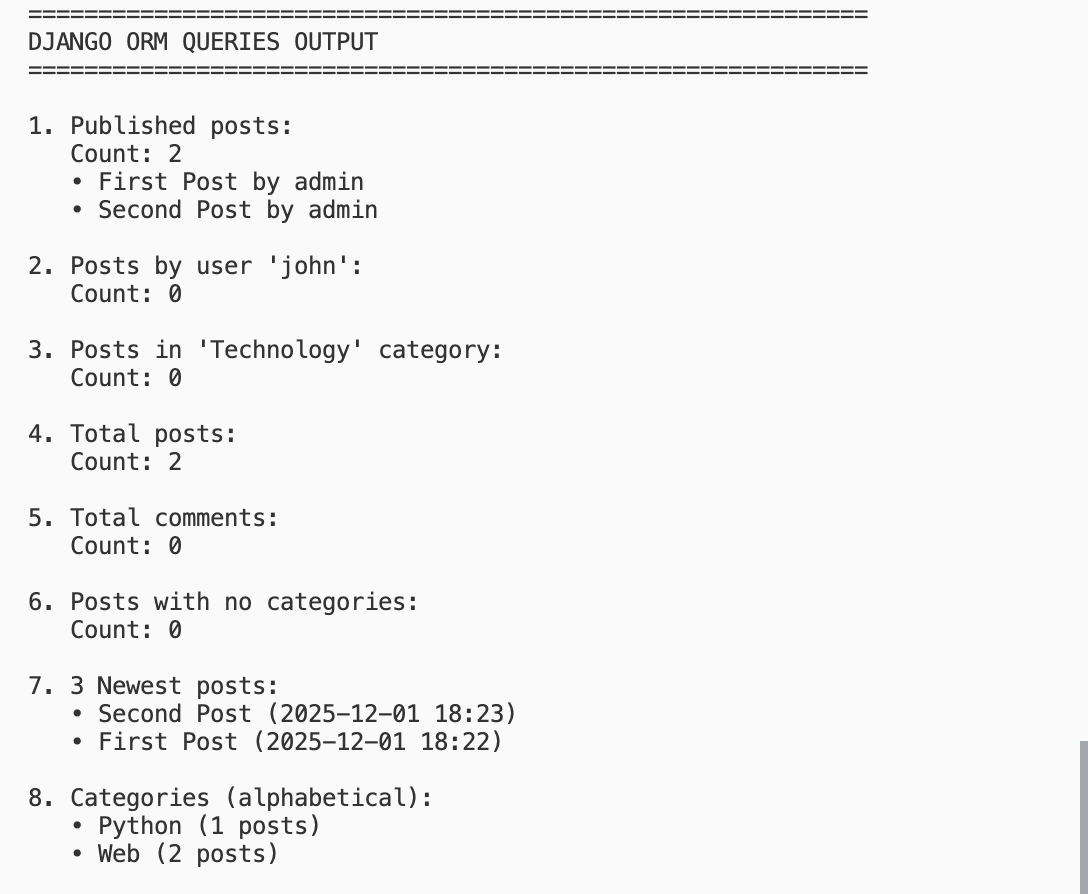

### 3. Add a View Counter
- Step 1: Update Model to add a views integer field
  ```python
  # models.py
  class Post(models.Model):
    ...
    # add
    views = models.IntegerField(default=0)
  ```
- Step 2: Create & Run Migration
- Step 3: Increase the post views when the post_detail view is processed
  ```python
  # views.py
  def post_detail(request, post_id):
    # add
    post.views += 1
    post.save()
  ```
- Step 4: Update Admin to show post views
  ```python
  @admin.register(Post)
    class PostAdmin(admin.ModelAdmin):
        # ADD 'views' to list_display
        list_display = ('title', 'author', 'published', 'views', 'get_categories')
        ...
        
  ```
- Step 5: Show in Template
```html
<!-- In post_detail.html, add: -->
<div class="meta">
    {{ post.views }} views
</div>
```

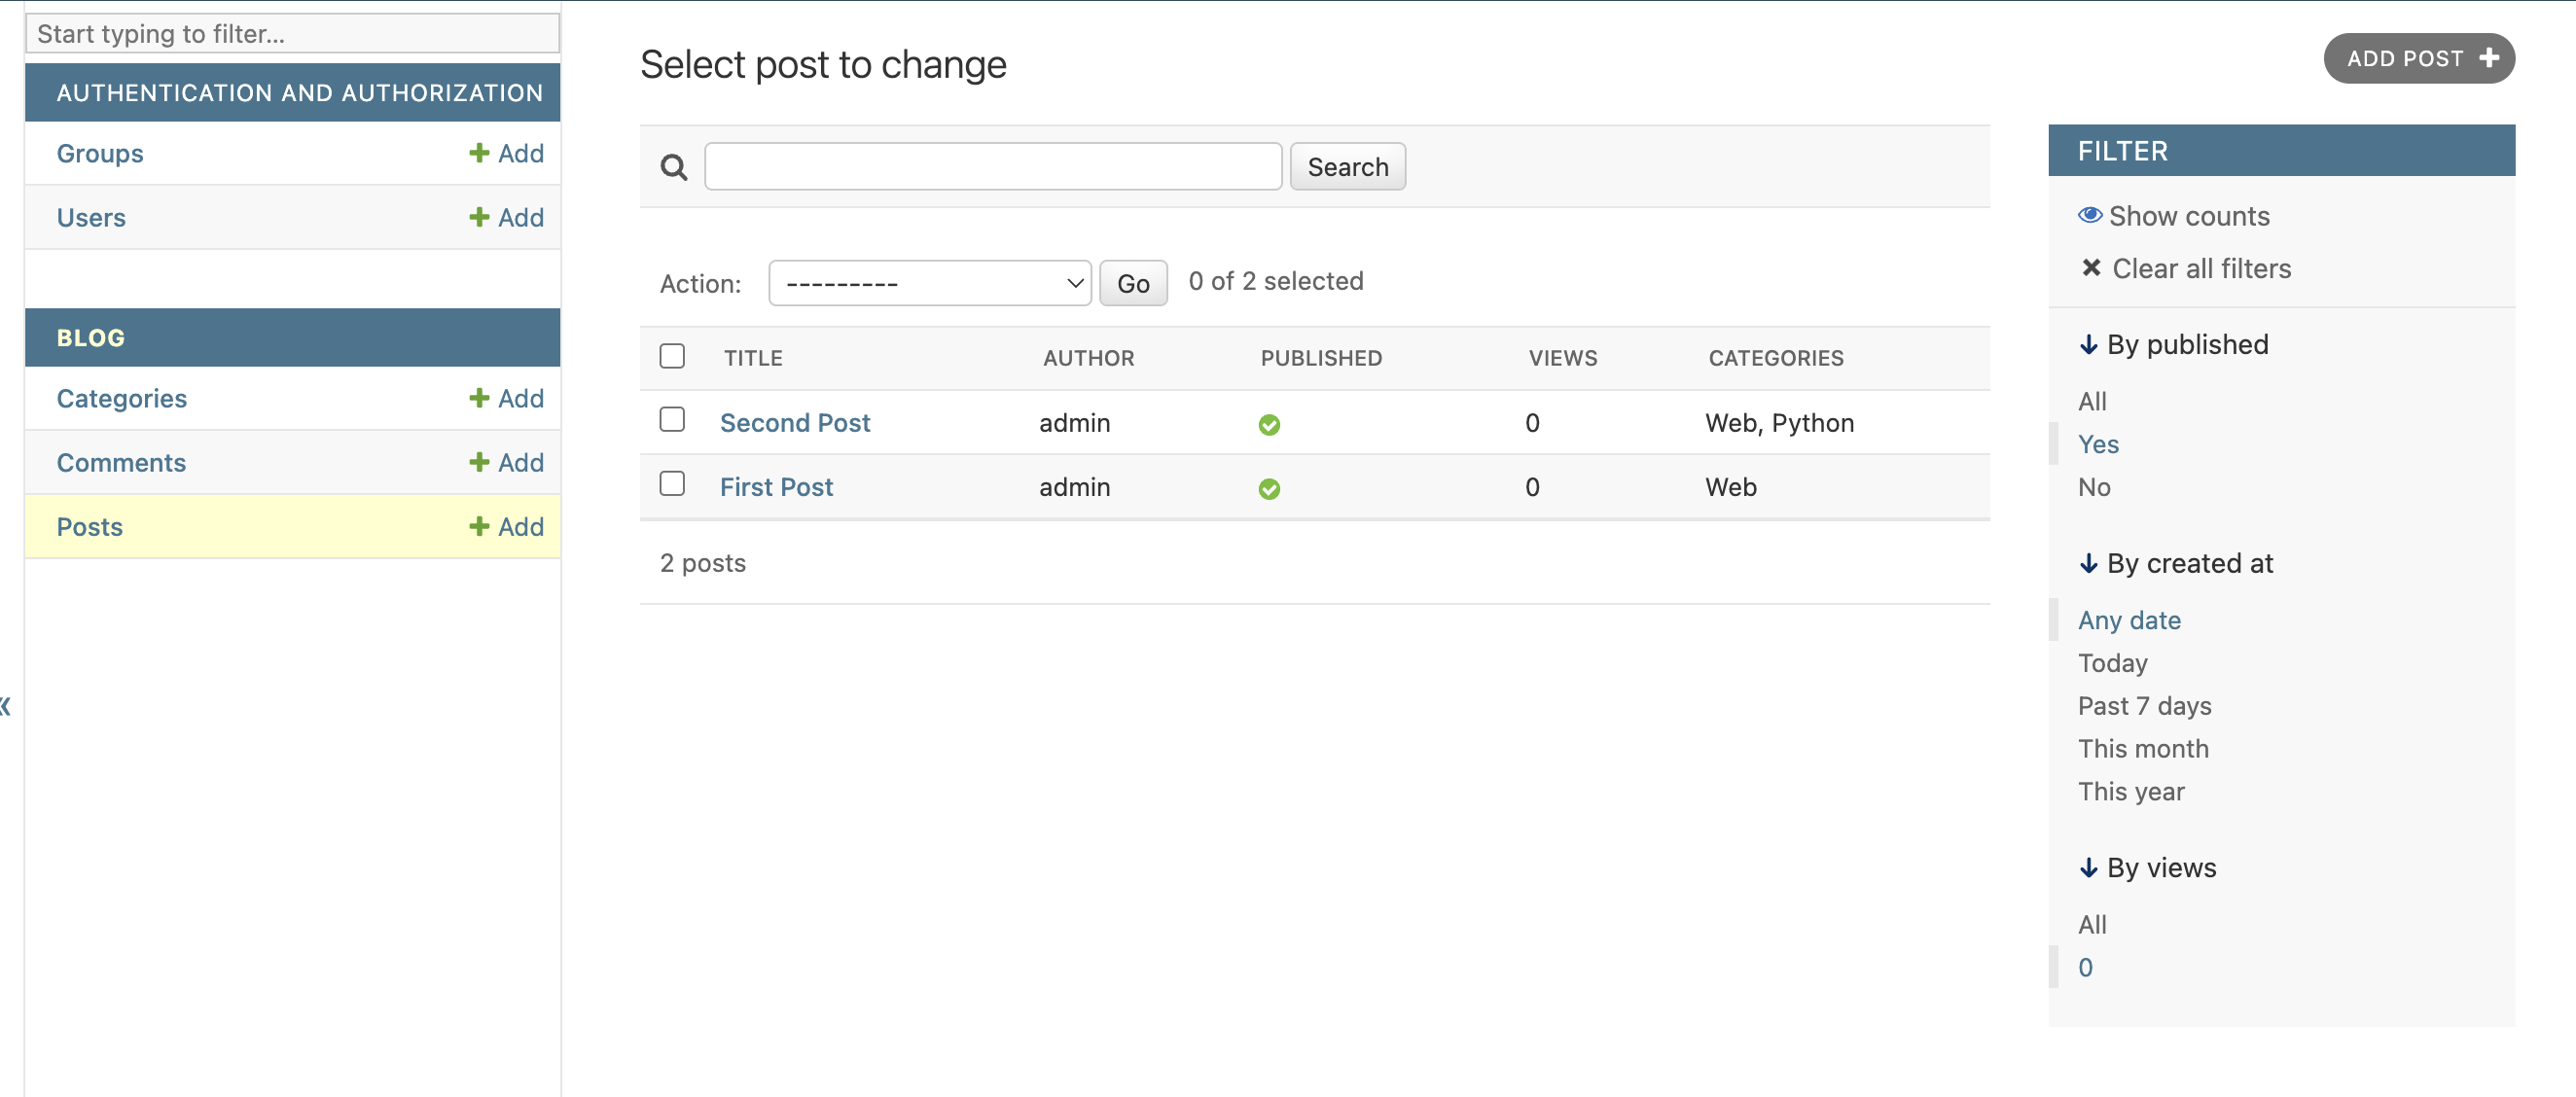

### 4. Add Custom Model Methods
- Add These Methods to Post Model
``` python
def get_excerpt(self):
    """Return first 100 characters of content"""

def published_recently(self):
    """Check if published in last 7 days"""

def has_multiple_categories(self):
    """Check if post has more than one category"""
```

- Use in Templates:
```html
<!-- In index.html: -->
<p>{{ post.get_excerpt }}</p>

{% if post.published_recently %}
    <span class="badge">🆕 New!</span>
{% endif %}
```

- use in Admin:
``` python
# Add to PostAdmin list_display:
def is_new(self, obj):
    return obj.published_recently()
is_new.boolean = True
is_new.short_description = 'Recent?'
```

